In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
files.upload()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
df=pd.read_csv('resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv')

# Explore data. 
**Get an overall feel of the data, explore which variables are important and which may be dropped. See summary statistics and visualise some or parts of the data.**

In [ ]:
len(df)

104712

In [ ]:
#Check null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104712 entries, 0 to 104711
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                104712 non-null  object 
 1   town                 104712 non-null  object 
 2   flat_type            104712 non-null  object 
 3   block                104712 non-null  object 
 4   street_name          104712 non-null  object 
 5   storey_range         104712 non-null  object 
 6   floor_area_sqm       104712 non-null  float64
 7   flat_model           104712 non-null  object 
 8   lease_commence_date  104712 non-null  int64  
 9   remaining_lease      104712 non-null  object 
 10  resale_price         104712 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 8.8+ MB


In [ ]:
#Check number of records for each flat types
df.groupby('flat_type').count()

,month,town,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
flat_type,,,,,,,,,,
1 ROOM,49,49,49,49,49,49,49,49,49,49
2 ROOM,1560,1560,1560,1560,1560,1560,1560,1560,1560,1560
3 ROOM,24625,24625,24625,24625,24625,24625,24625,24625,24625,24625
4 ROOM,43538,43538,43538,43538,43538,43538,43538,43538,43538,43538
5 ROOM,26506,26506,26506,26506,26506,26506,26506,26506,26506,26506
EXECUTIVE,8382,8382,8382,8382,8382,8382,8382,8382,8382,8382
MULTI-GENERATION,52,52,52,52,52,52,52,52,52,52


In [ ]:
#Check number of records for each lease commence year
df.groupby('lease_commence_date').count()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,remaining_lease,resale_price
lease_commence_date,,,,,,,,,,
1966,12,12,12,12,12,12,12,12,12,12
1967,534,534,534,534,534,534,534,534,534,534
1968,133,133,133,133,133,133,133,133,133,133
1969,489,489,489,489,489,489,489,489,489,489
1970,879,879,879,879,879,879,879,879,879,879
1971,460,460,460,460,460,460,460,460,460,460
1972,480,480,480,480,480,480,480,480,480,480
1973,591,591,591,591,591,591,591,591,591,591
1974,1121,1121,1121,1121,1121,1121,1121,1121,1121,1121


In [ ]:
#Check number of records for transaction months
df.groupby('month').count()

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
month,,,,,,,,,,
2017-01,1185,1185,1185,1185,1185,1185,1185,1185,1185,1185
2017-02,1085,1085,1085,1085,1085,1085,1085,1085,1085,1085
2017-03,1903,1903,1903,1903,1903,1903,1903,1903,1903,1903
2017-04,1839,1839,1839,1839,1839,1839,1839,1839,1839,1839
2017-05,1980,1980,1980,1980,1980,1980,1980,1980,1980,1980
2017-06,1747,1747,1747,1747,1747,1747,1747,1747,1747,1747
2017-07,1780,1780,1780,1780,1780,1780,1780,1780,1780,1780
2017-08,1960,1960,1960,1960,1960,1960,1960,1960,1960,1960
2017-09,1680,1680,1680,1680,1680,1680,1680,1680,1680,1680


In [ ]:
#See all data columns
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

In [ ]:
#See most expensive town base on mean resale price. 
df.groupby('town').median()['resale_price'].sort_values(ascending=False).head(5)

town
BUKIT TIMAH     716888.0
BISHAN          625000.0
QUEENSTOWN      610000.0
BUKIT MERAH     585000.0
CENTRAL AREA    510000.0
Name: resale_price, dtype: float64

In [ ]:
#See number of unique towns.
df['town'].nunique()

26

In [ ]:
#Rank town by median price from highest to lowest.
town_median_order = df.groupby('town').median()['resale_price'].sort_values(ascending=False).index
town_median_order

Index(['BUKIT TIMAH', 'BISHAN', 'QUEENSTOWN', 'BUKIT MERAH', 'CENTRAL AREA',
       'PASIR RIS', 'SERANGOON', 'KALLANG/WHAMPOA', 'MARINE PARADE',
       'TAMPINES', 'PUNGGOL', 'SENGKANG', 'BUKIT PANJANG', 'CLEMENTI',
       'TOA PAYOH', 'HOUGANG', 'JURONG EAST', 'JURONG WEST', 'CHOA CHU KANG',
       'GEYLANG', 'SEMBAWANG', 'WOODLANDS', 'BEDOK', 'BUKIT BATOK', 'YISHUN',
       'ANG MO KIO'],
      dtype='object', name='town')

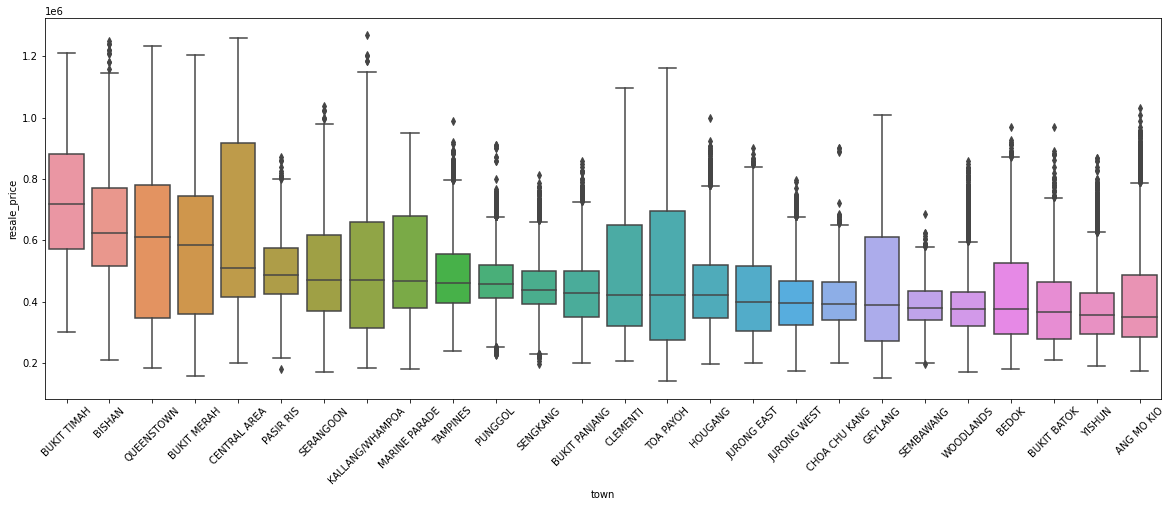

In [ ]:
#See quantile and spread of resale_price categorised by town ordered by median price 
plt.figure(figsize=(20,7))
plt.xticks(rotation=45)
sns.boxplot(x='town',y='resale_price',data=df,order=town_median_order)

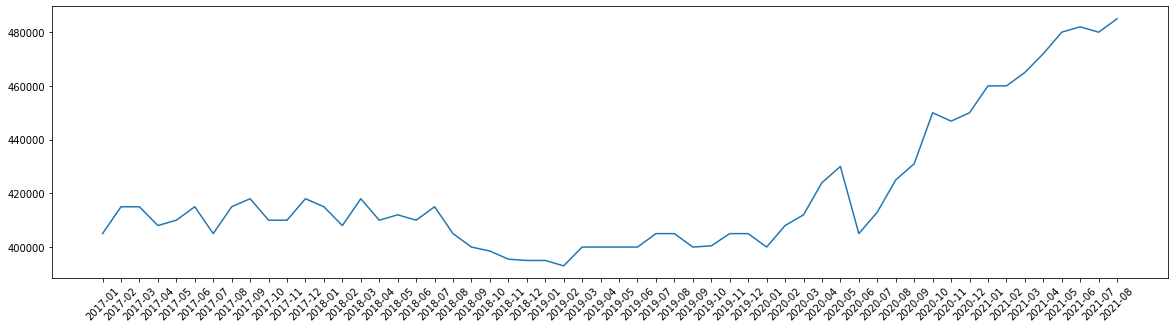

In [ ]:
#See median resale price sold across the years
median_price_by_year = df.groupby('month').median()['resale_price']
plt.figure(figsize=(20,5))
plt.xticks(rotation=45)
plt.plot(median_price_by_year)

In [ ]:
df.groupby('lease_commence_date').median()['resale_price'].index



Int64Index([1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
            1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
            1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
            1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
            2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
           dtype='int64', name='lease_commence_date')

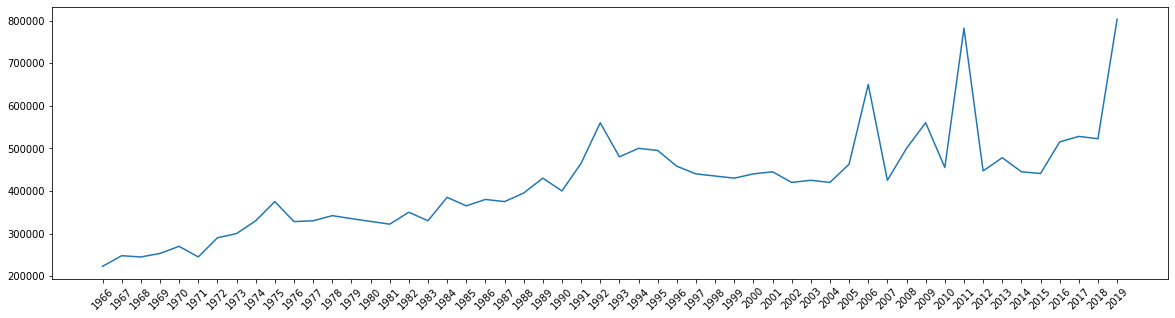

In [ ]:
#See median price by lease_commence_date (age of flat)
median_price_by_lease_date = df.groupby('lease_commence_date').median()['resale_price']
plt.figure(figsize=(20,5))
plt.xticks(ticks=median_price_by_lease_date.index,rotation=45)
plt.plot(median_price_by_lease_date)


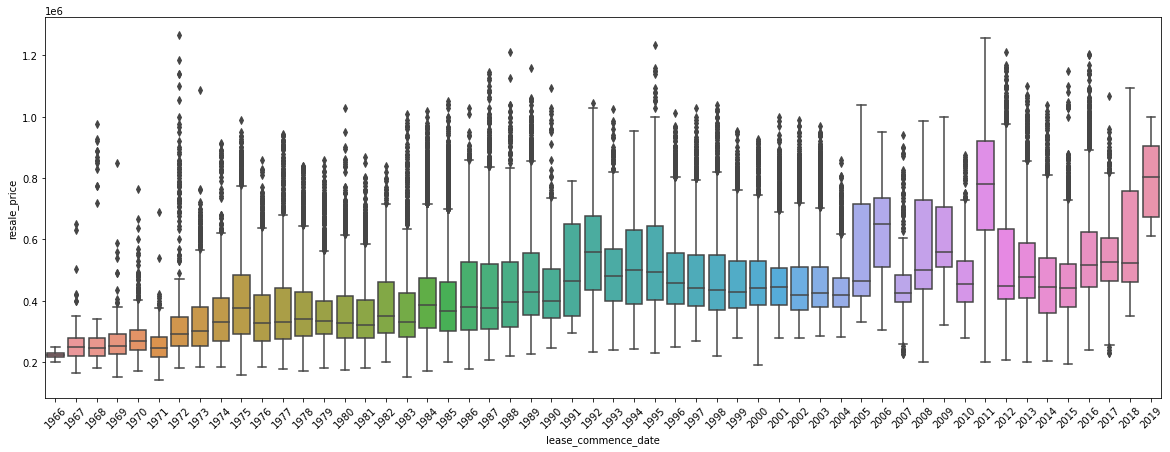

In [ ]:
#See quantile and spread of resale price by lease_commence_date
plt.figure(figsize=(20,7))
plt.xticks(rotation=45)
sns.boxplot(x='lease_commence_date', y='resale_price', data=df) 

In [ ]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

In [ ]:
#See median prices by flat_model
median_price_by_fmodel = df.groupby('flat_model').median()['resale_price'].sort_values(ascending=False)
median_price_by_fmodel_order = median_price_by_fmodel.index
median_price_by_fmodel

flat_model
Type S2                   1035000.0
Type S1                    940000.0
Premium Apartment Loft     900000.0
Terrace                    825000.0
Multi Generation           793888.0
DBSS                       750000.0
Premium Maisonette         720000.0
Model A-Maisonette         720000.0
Improved-Maisonette        685000.0
Adjoined flat              675000.0
Maisonette                 660000.0
Apartment                  605000.0
Premium Apartment          465000.0
Improved                   450000.0
Model A                    408000.0
Model A2                   345000.0
Simplified                 330000.0
New Generation             318000.0
Standard                   312000.0
2-room                     250000.0
Name: resale_price, dtype: float64

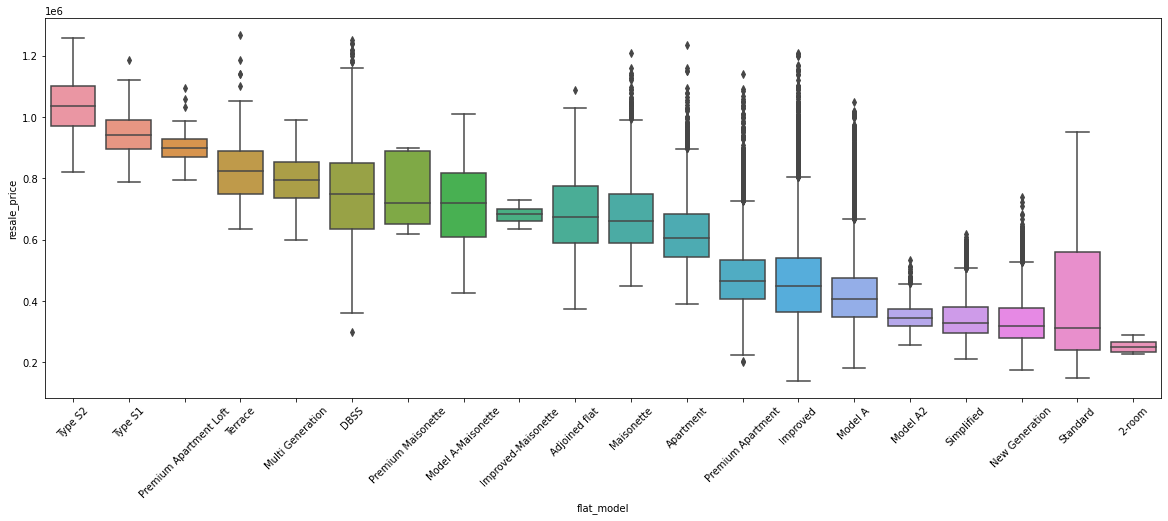

In [ ]:
plt.figure(figsize=(20,7))
plt.xticks(rotation=45)
sns.boxplot(x='flat_model',y='resale_price',data=df,order=median_price_by_fmodel_order)

In [ ]:
#See median prices by flat_types
median_price_by_ftype = df.groupby('flat_type').median()['resale_price'].sort_values(ascending=False)
median_price_by_ftype_order = median_price_by_ftype.index
median_price_by_ftype

flat_type
MULTI-GENERATION    793888.0
EXECUTIVE           620000.0
5 ROOM              500000.0
4 ROOM              418000.0
3 ROOM              300000.0
2 ROOM              232400.0
1 ROOM              183000.0
Name: resale_price, dtype: float64

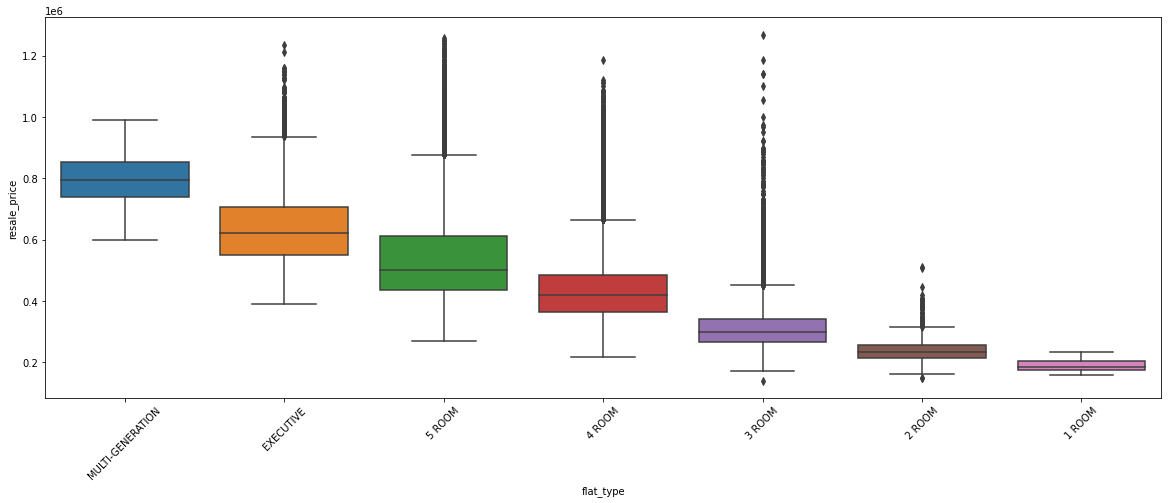

In [ ]:
plt.figure(figsize=(20,7))
plt.xticks(rotation=45)
sns.boxplot(x='flat_type',y='resale_price',data=df,order=median_price_by_ftype_order)

In [ ]:
#Examine outliers of 3, 4, 5, Executive
df[df['flat_type']=='EXECUTIVE'].sort_values(ascending=False, by='resale_price').head(20)
                                                                                   

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
100502,2021-06,QUEENSTOWN,EXECUTIVE,150,MEI LING ST,10 TO 12,148.0,Apartment,1995,73 years 05 months,1235000.0
90575,2021-02,BUKIT TIMAH,EXECUTIVE,2,TOH YI DR,13 TO 15,154.0,Maisonette,1988,66 years 06 months,1210000.0
95209,2021-04,BUKIT TIMAH,EXECUTIVE,6,TOH YI DR,13 TO 15,154.0,Maisonette,1989,67 years 03 months,1160000.0
10854,2017-07,QUEENSTOWN,EXECUTIVE,148,MEI LING ST,19 TO 21,156.0,Apartment,1995,77 years 03 months,1160000.0
53765,2019-07,QUEENSTOWN,EXECUTIVE,148,MEI LING ST,19 TO 21,147.0,Apartment,1995,75 years 03 months,1150000.0
31827,2018-07,QUEENSTOWN,EXECUTIVE,148,MEI LING ST,19 TO 21,149.0,Apartment,1995,76 years 03 months,1150000.0
45124,2019-03,BISHAN,EXECUTIVE,173,BISHAN ST 13,19 TO 21,163.0,Maisonette,1987,67 years 01 month,1145000.0
91507,2021-02,QUEENSTOWN,EXECUTIVE,150,MEI LING ST,04 TO 06,147.0,Maisonette,1995,73 years 08 months,1138800.0
37023,2018-10,BISHAN,EXECUTIVE,179,BISHAN ST 13,22 TO 24,163.0,Maisonette,1987,67 years 10 months,1138000.0
90574,2021-02,BUKIT TIMAH,EXECUTIVE,3,TOH YI DR,10 TO 12,146.0,Maisonette,1988,66 years 07 months,1128000.0


In [ ]:
#Check how many unique story levels
df['storey_range'].nunique()

17

In [ ]:
#Check how many unique street names
df['street_name'].nunique()

553

# Feature Engineering.
**Preprocess data. Remove or fill any missing data. Remove unnecessary or repetitive features and convert non-numeric columns to one-hot encoding.**

In [ ]:
 #Review all columns
 df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date',
       'remaining_lease', 'resale_price'],
      dtype='object')

In [ ]:
#Convert 'month' to date object for ease of manipulation
df['month'] = pd.to_datetime(df['month'])

In [ ]:
#Convert 'month' column to numeric by adding new columns 'transaction_yr' and 'transaction_mth'.
#Drop 'month' column after new columns were added.
df['transaction_yr'] = df['month'].apply(lambda yr: yr.year)
df['transaction_mth'] = df['month'].apply(lambda mth: mth.month)

In [ ]:
df = df.drop('month',axis=1)

In [ ]:
#Remaining lease and lease commence date accomplish the same purpose and one can be derived from the other with the transaction 'month' column.
#Drop lease commence date.
df = df.drop('lease_commence_date', axis=1)

In [ ]:
#Convert remaining lease into new numeric columns, separating year from month. i.e. remaining_year & remaining_months 
#Drop 'remaining_lease' column after new columns are created.
df['remaining_yr'] = df['remaining_lease'].apply(lambda yr: int(yr[:2]))
df['remaining_mth'] = df['remaining_lease'].apply(lambda mth: int(mth[-9:-6]))

In [ ]:
df = df.drop('remaining_lease', axis=1)

In [ ]:
#There are too many street names for it to be useful. Without the street names, the block is not useful too.
#Drop both street name and block columns.
df['street_name'].nunique()

553

In [ ]:
df = df.drop(['street_name', 'block'],axis=1)

In [ ]:
#Convert 'storey_range' to numerical columns. i.e. 'storey_start' & 'story_end'
#Drop 'story_range' after new columns are created.
df['story_start'] = df['storey_range'].apply(lambda st: int(st[:2]))
df['story_end'] = df['storey_range'].apply(lambda st: int(st[-2:]))

In [ ]:
df = df.drop('storey_range',axis=1)

In [ ]:
df.columns


Index(['town', 'flat_type', 'floor_area_sqm', 'flat_model', 'resale_price',
       'transaction_yr', 'transaction_mth', 'remaining_yr', 'remaining_mth',
       'story_start', 'story_end'],
      dtype='object')

In [ ]:
#Map flat type to below reference to convert flat type to numeric.
flat_type_map = {'1 ROOM':1, '2 ROOM':2, '3 ROOM':3, '4 ROOM':4, '5 ROOM':5, 'EXECUTIVE':6, 'MULTI-GENERATION':7}
df['flat_type'] = df['flat_type'].map(flat_type_map)

In [ ]:
#There are 26 towns. We will keep them given it's high relevance.
#We will do the one-hot encoding, apply 'drop_first' to remove duplicated data and then dropping the original 'town' column.
df['town'].nunique() 

26

In [ ]:
town_onehot = pd.get_dummies(df['town'],drop_first=True)
town_onehot

,BEDOK,BISHAN,BUKIT BATOK,BUKIT MERAH,BUKIT PANJANG,BUKIT TIMAH,CENTRAL AREA,CHOA CHU KANG,CLEMENTI,GEYLANG,HOUGANG,JURONG EAST,JURONG WEST,KALLANG/WHAMPOA,MARINE PARADE,PASIR RIS,PUNGGOL,QUEENSTOWN,SEMBAWANG,SENGKANG,SERANGOON,TAMPINES,TOA PAYOH,WOODLANDS,YISHUN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104707,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
104708,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
104709,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
104710,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
df = pd.concat([df,town_onehot],axis=1)


In [ ]:
df = df.drop('town', axis=1)

In [ ]:
#We will do the same for 'flat_model'. 
#We will apply 'drop_first' on the one_hot encoding and also drop the 'flat_model' afterwards.
df['flat_model'].nunique()

20

In [ ]:
flat_model_onehot = pd.get_dummies(df['flat_model'],drop_first=True)
flat_model_onehot 

,Adjoined flat,Apartment,DBSS,Improved,Improved-Maisonette,Maisonette,Model A,Model A-Maisonette,Model A2,Multi Generation,New Generation,Premium Apartment,Premium Apartment Loft,Premium Maisonette,Simplified,Standard,Terrace,Type S1,Type S2
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104707,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
104708,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
104709,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
104710,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df = pd.concat([df,flat_model_onehot],axis=1)


In [ ]:
df = df.drop('flat_model',axis=1)

In [ ]:
df

,flat_type,floor_area_sqm,resale_price,transaction_yr,transaction_mth,remaining_yr,remaining_mth,story_start,story_end,BEDOK,BISHAN,BUKIT BATOK,BUKIT MERAH,BUKIT PANJANG,BUKIT TIMAH,CENTRAL AREA,CHOA CHU KANG,CLEMENTI,GEYLANG,HOUGANG,JURONG EAST,JURONG WEST,KALLANG/WHAMPOA,MARINE PARADE,PASIR RIS,PUNGGOL,QUEENSTOWN,SEMBAWANG,SENGKANG,SERANGOON,TAMPINES,TOA PAYOH,WOODLANDS,YISHUN,Adjoined flat,Apartment,DBSS,Improved,Improved-Maisonette,Maisonette,Model A,Model A-Maisonette,Model A2,Multi Generation,New Generation,Premium Apartment,Premium Apartment Loft,Premium Maisonette,Simplified,Standard,Terrace,Type S1,Type S2
0,2,44.0,232000.0,2017,1,61,4,10,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,67.0,250000.0,2017,1,60,7,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,3,67.0,262000.0,2017,1,62,5,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,3,68.0,265000.0,2017,1,62,1,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,3,67.0,265000.0,2017,1,62,5,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104707,5,126.0,550000.0,2021,8,62,11,10,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
104708,5,122.0,500000.0,2021,8,65,7,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
104709,6,142.0,648000.0,2021,8,65,11,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
104710,6,146.0,620000.0,2021,8,63,1,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


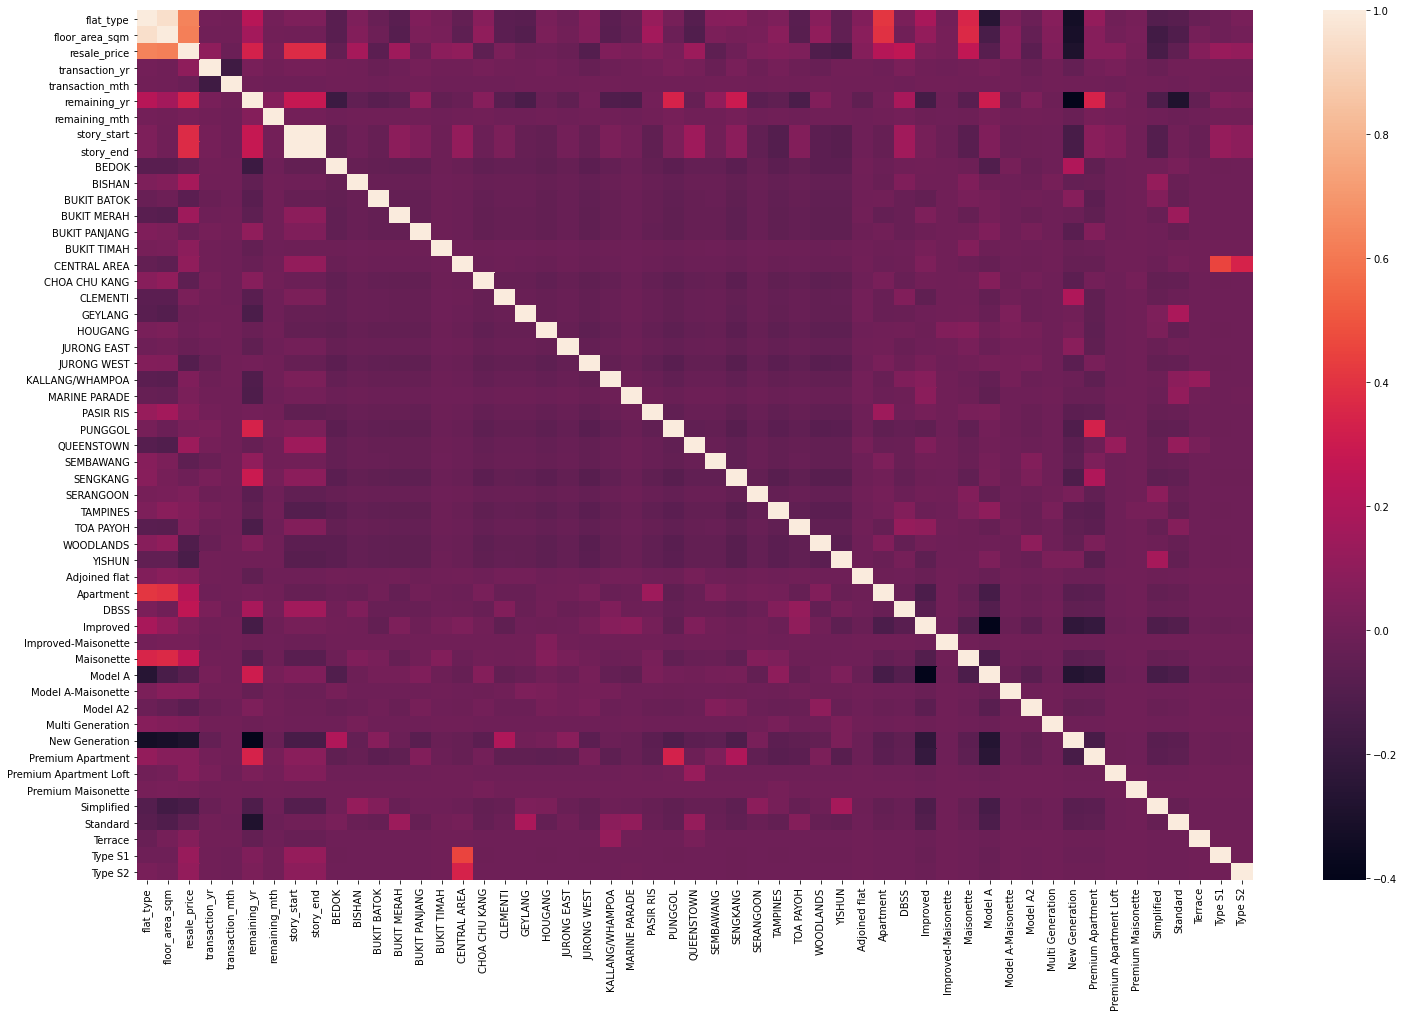

In [ ]:
#Check correlation of variables to see any variables are closely related. Collinearity affects standard error of mean and p-values which may affect our decision to reject the null hypothesis.
plt.figure(figsize=(25,16))
sns.heatmap(df.corr())

In [ ]:
#Drop flat_type (closely related to floor_area_sqm) and storey_end (closely related to storey start)
df = df.drop(['flat_type','story_end'],axis=1)

#Review data.
**Check completeness and integrity of data before proceeding to model training**

In [ ]:
#Check for any null values.
df.isnull().sum()

floor_area_sqm            0
resale_price              0
transaction_yr            0
transaction_mth           0
remaining_yr              0
remaining_mth             0
story_start               0
BEDOK                     0
BISHAN                    0
BUKIT BATOK               0
BUKIT MERAH               0
BUKIT PANJANG             0
BUKIT TIMAH               0
CENTRAL AREA              0
CHOA CHU KANG             0
CLEMENTI                  0
GEYLANG                   0
HOUGANG                   0
JURONG EAST               0
JURONG WEST               0
KALLANG/WHAMPOA           0
MARINE PARADE             0
PASIR RIS                 0
PUNGGOL                   0
QUEENSTOWN                0
SEMBAWANG                 0
SENGKANG                  0
SERANGOON                 0
TAMPINES                  0
TOA PAYOH                 0
WOODLANDS                 0
YISHUN                    0
Adjoined flat             0
Apartment                 0
DBSS                      0
Improved            

In [ ]:
#Check if there is any non-numeric types
df.select_dtypes(include='object').columns

Index([], dtype='object')

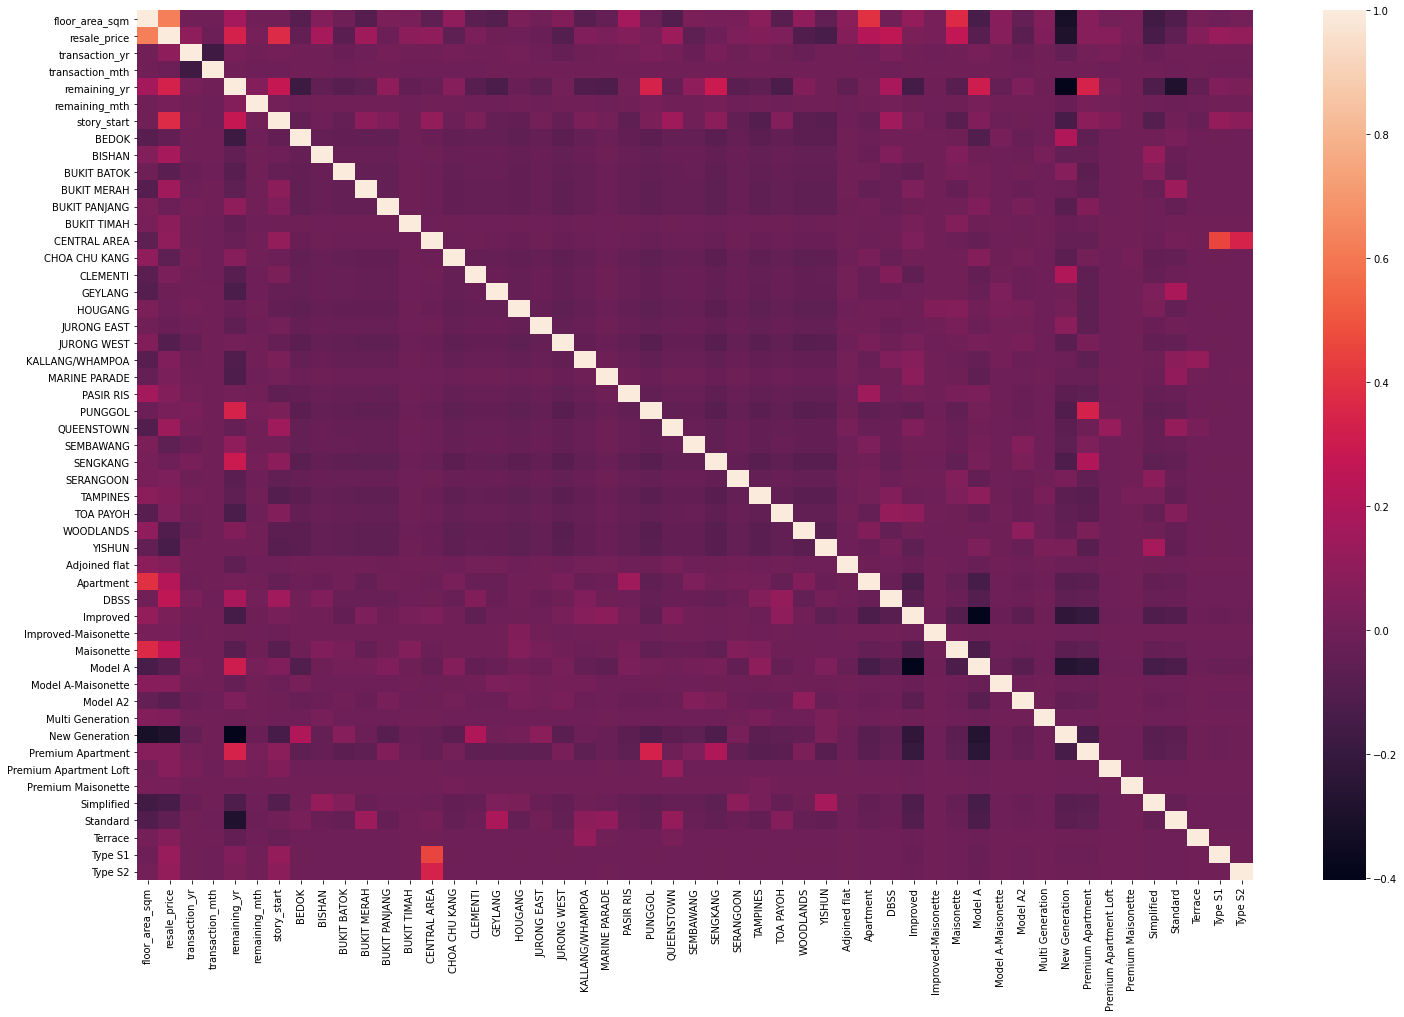

In [ ]:
#Check heatmap again
plt.figure(figsize=(25,16))
sns.heatmap(df.corr())

#Model Training and Fitting.
**Generate training and testing data. Create model to be used for prediction.**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
#Set entire dataset (excluding 'resale_price') as X. i.e. as variables or predictors. 
#Set 'resale_price' as y.
#Convert to numpy arrays using .values
y = df['resale_price'].values
X = df.drop('resale_price',axis=1).values

In [ ]:
#Split data 70% training and 30% test validaiton.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

In [ ]:
#Normalise data using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

In [ ]:
#See shape of X_train, determine number of nodes base on variable count
X_train.shape

(73298, 50)

In [ ]:
#Create model with 5 Dense layers (exclusing last) with 52 nodes each.
#Include a 50% dropout layer after each Dense layer.
#Compile with 'adam' optimiser and measure mean-squared-error loss.
model = Sequential()

model.add(Dense(52, activation='relu')) 
model.add(Dropout(0.5))

model.add(Dense(52, activation='relu')) 
model.add(Dropout(0.5))

model.add(Dense(52, activation='relu')) 
model.add(Dropout(0.5))

model.add(Dense(52, activation='relu')) 
model.add(Dropout(0.5))

model.add(Dense(52, activation='relu')) 
model.add(Dropout(0.5))

model.add(Dense(1,))

model.compile(optimizer='adam', loss='mse')

In [ ]:
#Define condition for early stopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

In [ ]:
#Fit the model to the data.
#Use a high epoch (500) but with early stopping.
#Include 'validation_data' to cross check with test data along the way.
#Use batch size of 32 (arbituary)
model.fit(X_train, 
          y_train,
          batch_size=32,
          epochs=500,
          validation_data=(X_test,y_test),
          callbacks=[early_stop]
          )

Epoch 1/500
2291/2291 [==============================] - 6s 2ms/step - loss: 44563087360.0000 - val_loss: 8280639488.0000
Epoch 2/500
2291/2291 [==============================] - 5s 2ms/step - loss: 27846522880.0000 - val_loss: 7758965248.0000
Epoch 3/500
2291/2291 [==============================] - 5s 2ms/step - loss: 26500435968.0000 - val_loss: 6502226432.0000
Epoch 4/500
2291/2291 [==============================] - 6s 2ms/step - loss: 25106593792.0000 - val_loss: 4752682496.0000
Epoch 5/500
2291/2291 [==============================] - 6s 3ms/step - loss: 23984449536.0000 - val_loss: 4114805504.0000
Epoch 6/500
2291/2291 [==============================] - 5s 2ms/step - loss: 22860322816.0000 - val_loss: 5037007872.0000
Epoch 7/500
2291/2291 [==============================] - 6s 2ms/step - loss: 22242105344.0000 - val_loss: 5112916992.0000
Epoch 8/500
2291/2291 [==============================] - 5s 2ms/step - loss: 22086549504.0000 - val_loss: 3596583424.0000
Epoch 9/500
2291/2291 [=

#Model Evaluation
**View and analysis loss graph, confusion matrix and classification report. Use model to predict new data and check for accuracy.**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

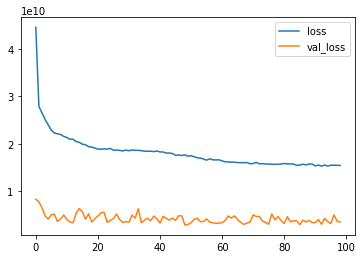

In [ ]:
#Quick preview of result
losses = pd.DataFrame(model.history.history)
losses.plot()

In [ ]:
#See predictions on test data
predictions = model.predict(X_test)

In [ ]:
#See mean squared error, mean absolute error, explained variance score
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,predictions)))
print("Mean Abosulute Error: ", mean_absolute_error(y_test,predictions))
print("Explained Variance Score: ", explained_variance_score(y_test, predictions))

Root Mean Squared Error:  58990.6907709789
Mean Abosulute Error:  44033.753865434206
Explained Variance Score:  0.8721388191644897


In [ ]:
#Percentage error to mean resale price
100*np.sqrt(mean_squared_error(y_test,predictions))/df['resale_price'].mean()

13.047548783645022

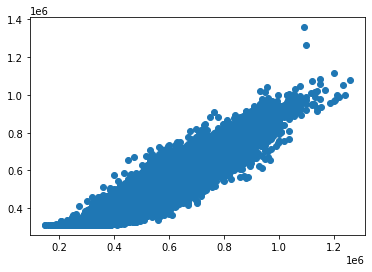

In [ ]:
#See how well predictions matches true test values.
plt.scatter(y_test, predictions)

In [ ]:
#Test with new data extracted from PropertyGuru https://www.propertyguru.com.sg/listing/hdb-for-sale-38b-bendemeer-road-23502555
#Listing price is S$685000
new_test_data = pd.DataFrame({'floor_area_sqm':[89], 'transaction_yr':[2021], 'transaction_mth':[9], 'remaining_yr':[90], 'remaining_mth':[0], 'story_start':[1], 'BEDOK':[0], 'BISHAN':[0], 'BUKIT BATOK':[0], 'BUKIT MERAH':[0], 'BUKIT PANJANG':[0], 'BUKIT TIMAH':[0], 'CENTRAL AREA':[0], 'CHOA CHU KANG':[0], 'CLEMENTI':[0], 'GEYLANG':[0], 'HOUGANG':[0], 'JURONG EAST':[0], 'JURONG WEST':[0], 'KALLANG/WHAMPOA':[1], 'MARINE PARADE':[0], 'PASIR RIS':[0], 'PUNGGOL':[0], 'QUEENSTOWN':[0], 'SEMBAWANG':[0], 'SENGKANG':[0], 'SERANGOON':[0], 'TAMPINES':[0], 'TOA PAYOH':[0], 'WOODLANDS':[0], 'YISHUN':[0], 'Adjoined flat':[0], 'Apartment':[0], 'DBSS':[0], 'Improved':[0], 'Improved-Maisonette':[0], 'Maisonette':[0], 'Model A':[1], 'Model A-Maisonette':[0], 'Model A2':[0], 'Multi Generation':[0], 'New Generation':[0], 'Premium Apartment':[0], 'Premium Apartment Loft':[0], 'Premium Maisonette':[0], 'Simplified':[0], 'Standard':[0], 'Terrace':[0], 'Type S1':[0], 'Type S2':[0],})

In [ ]:
#Normalise data and use model to predict selling price
new_test_data = new_test_data.values
new_test_data.shape
new_test_data = scaler.transform(new_test_data)

In [ ]:
predicted_flat_price = model.predict(new_test_data)[0][0]
#See below for details on prediction

#Results






In [ ]:
#Recap
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,predictions)))
print("Mean Abosulute Error: ", mean_absolute_error(y_test,predictions))
print("Explained Variance Score (R^2): ", explained_variance_score(y_test, predictions))

Root Mean Squared Error:  58990.6907709789
Mean Abosulute Error:  44033.753865434206
Explained Variance Score (R^2):  0.8721388191644897


In [ ]:
#Percentage error (RMSE) of regression against mean resale price of dataset
100*np.sqrt(mean_squared_error(y_test,predictions))/np.mean(df['resale_price']) 

13.047548783645022

In [ ]:
#Calculate F-Statistics using the formula ((R^2)/(1-R^2))*((n-p-1)/(p))
r2 = explained_variance_score(y_test, predictions)
observations, variables = X_train.shape
print("F-Statistics: ",  (r2/(1-r2))*((observations-variables-1)/variables))

F-Statistics:  9992.329441963017


In [ ]:
#Prediction of new listing
print('Listing Price on PropertyGuru: ', 'SGD$ 685000')
print('Predicted Price using model: SGD$', predicted_flat_price)
print('Percentage error: ', 100*(actual_listing_price-predicted_flat_price)/actual_listing_price)

Listing Price on PropertyGuru:  SGD$ 685000
Predicted Price using model: SGD$ 585912.56
Percentage error:  14.465319343065694


#Analysis
* Model produced a RMSE of around $60000, within 13.04% of the mean resale price.
* With a F-statistics of almost 10000, it showed that the variables are useful in predicting the resale price and we could reject the null hypothesis.
* With an R^2 value of 0.87, we could say that much of the resale price was explained by the variables of used. We could also say that a good proportion of the variability was removed by the regression.

In [ ]:
model.save("./Resale_Flat_Valuation.h5")